# Introduction to Hydrogeochemical Data Visualization with WQChartPy

## Learning Objectives
By the end of this notebook, you will be able to:
1. Understand the basics of hydrogeochemical data visualization
2. Install and import WQChartPy
3. Load and prepare water chemistry data for plotting
4. Create basic hydrogeochemical diagrams
5. Interpret common hydrogeochemical plots

## What is WQChartPy?

WQChartPy is a Python package for creating geochemical diagrams used in water quality analysis and hydrogeochemistry. It can generate 12 different types of diagrams including:

- **Piper diagrams** (Triangle, Rectangle, Color-coded, Contour-filled)
- **Stiff diagrams**
- **Durov diagrams**
- **Schoeller diagrams**
- **Gibbs diagrams**
- **Chadha diagrams**
- **Gaillardet diagrams**
- **HFE-D diagrams**
- **Chernoff faces**

## Installation and Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Understanding Water Chemistry Data Format

WQChartPy requires data in a specific format. Let's examine the required columns:

In [8]:
from wqchartpy import triangle_piper

# Load the template dataset
df = pd.read_csv('/workspaces/hwrs564a_course_materials_guybwall/content_weekly/week_05/datasets/cleaned_data_for_hw3_4.csv')

# Display the data
print("\nData shape:", df.shape)
df


Data shape: (2, 21)


,Unnamed: 0,Well,Ca,Mg,Na,K,Si,F,Cl,HCO3,...,NO3,pH,Temp (°C),Label,Color,Marker,CO3,Size,Alpha,Sample
0,0,F-008A,36.7,4.25,14.7,1.22,12.2,0.16,4.80,134,...,13.10,7.71,22.3,F-008A,red,o,0.0,30,0.8,1
1,1,Martin,30.4,0.83,52.8,1.88,14.6,0.21,8.29,131,...,4.18,7.77,30.0,Martin,blue,s,0.0,30,0.8,2


### Required Columns Explained:

1. **Sample**: Sample name or ID
2. **Label**: Group identifier (used for categorizing samples)
3. **Color**: Color for plotting (matplotlib color names or hex codes)
4. **Marker**: Marker style for plotting (matplotlib marker codes)
5. **Size**: Marker size for plotting
6. **Alpha**: Transparency (0 = transparent, 1 = opaque)
7. **pH**: pH value
8. **Major Ions**: Ca, Mg, Na, K, HCO3, CO3, Cl, SO4 (all in mg/L)
9. **TDS**: Total Dissolved Solids (mg/L)

In [10]:
# Basic statistics for the template data
print("Basic Statistics for Template Dataset:")
print("======================================")

# Select only the chemical parameter columns
chem_cols = ['pH', 'Ca', 'Mg', 'Na', 'K', 'HCO3', 'CO3', 'Cl', 'SO4']
df[chem_cols].describe().round(2)

Basic Statistics for Template Dataset:


,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
count,2.00,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00
mean,7.74,33.55,2.54,33.75,1.55,132.50,0.0,6.54,33.75
std,0.04,4.45,2.42,26.94,0.47,2.12,0.0,2.47,30.33
min,7.71,30.40,0.83,14.70,1.22,131.00,0.0,4.80,12.30
25%,7.72,31.98,1.68,24.22,1.38,131.75,0.0,5.67,23.02
50%,7.74,33.55,2.54,33.75,1.55,132.50,0.0,6.54,33.75
75%,7.76,35.12,3.40,43.28,1.72,133.25,0.0,7.42,44.48
max,7.77,36.70,4.25,52.80,1.88,134.00,0.0,8.29,55.20


In [11]:
print("\nSample Groups:")
df['Label'].value_counts()


Sample Groups:


Label
F-008A    1
Martin    1
Name: count, dtype: int64

In [12]:
print("\nTDS Range by Group:")
for group in df['Label'].unique():
    group_data = df[df['Label'] == group]
    print(f"{group}: {group_data['TDS'].min():.1f} - {group_data['TDS'].max():.1f} mg/L")


TDS Range by Group:


KeyError: 'TDS'

## Your First Hydrogeochemical Plot: Piper Diagram

The Piper diagram is one of the most widely used plots in hydrogeochemistry. It shows the relative concentrations of major cations and anions.

Trilinear Piper plot created. Saving it to /workspaces/hwrs564a_course_materials_guybwall/content_weekly/week_05 



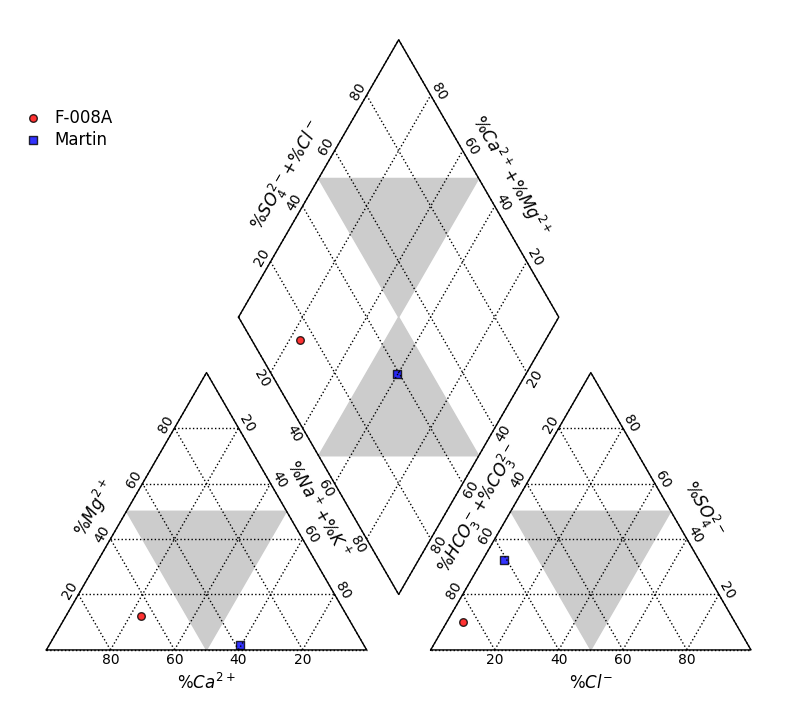

In [13]:
# Import the triangle Piper module
from wqchartpy import triangle_piper

triangle_piper.plot(
    df, unit='mg/L', 
    figname='./plots/example_triangle_piper', figformat='png'
)

## Understanding the Piper Diagram

The Piper diagram consists of:
- **Left triangle**: Cations (Ca²⁺, Mg²⁺, Na⁺+K⁺)
- **Right triangle**: Anions (Cl⁻, SO₄²⁻, HCO₃⁻+CO₃²⁻)
- **Central diamond**: Combined cation and anion composition

### Interpretation:
- Points closer to corners indicate dominance of that ion
- Points in the center indicate mixed water types
- Clustering indicates similar water chemistry

## Creating Multiple Plot Types

Let's create several different plot types to compare their strengths:

Stiff plot created for 1. Saving it to /workspaces/hwrs564a_course_materials_guybwall/content_weekly/week_05

Stiff plot created for 2. Saving it to /workspaces/hwrs564a_course_materials_guybwall/content_weekly/week_05



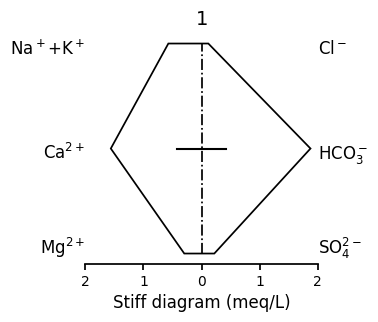

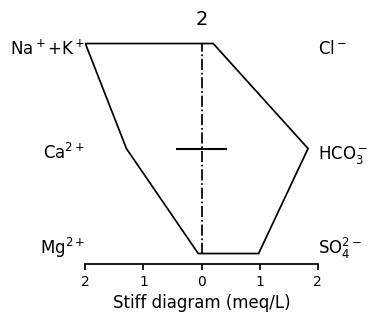

In [14]:
# Stiff diagram - creates unique 'fingerprints' for each water sample
from wqchartpy import stiff

#
# warnings.filterwarnings('ignore')

stiff.plot(
    df,  unit='mg/L', 
    figname='./plots/stiff_diagram_example', figformat='png'
)


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


Gibbs plot created. Saving it to /workspaces/hwrs564a_course_materials_guybwall/content_weekly/week_05 



findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic fa

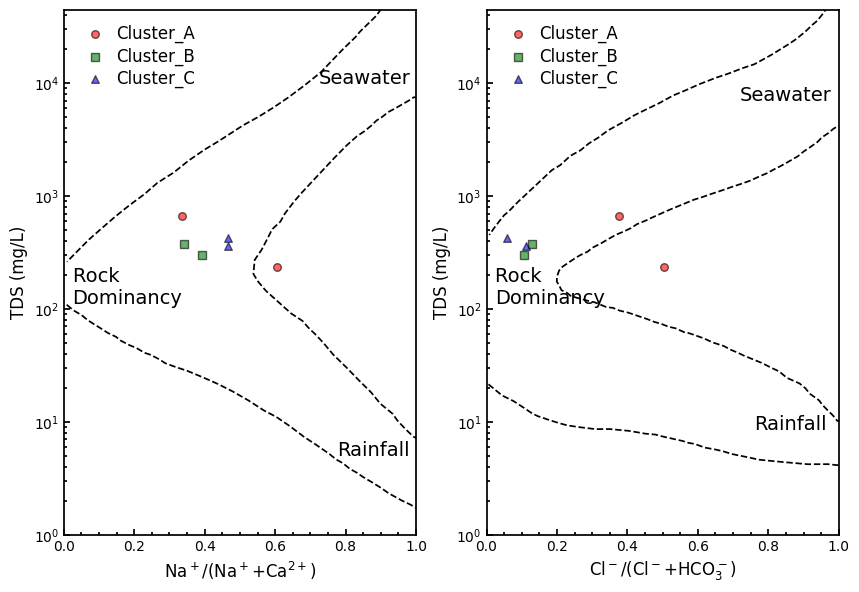

In [15]:
# Gibbs diagram - helps identify water-rock interaction processes
from wqchartpy import gibbs
warnings.filterwarnings('ignore')

gibbs.plot(
    df, unit='mg/L', 
    figname='./plots/gibbs_example', figformat='png'
)

Schoeller diagram created. Saving it to /workspaces/hwrs564a_course_materials_guybwall/content_weekly/week_05 



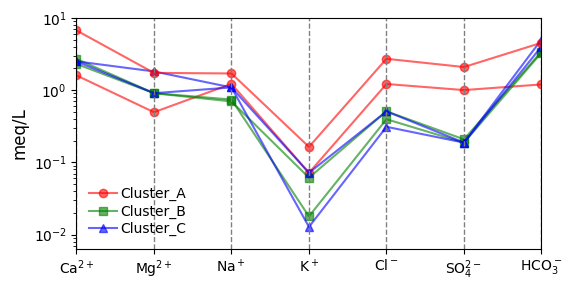

In [16]:
# Schoeller diagram - shows ion concentrations on a log scale
# Note: https://github.com/jyangfsu/WQChartPy/blob/main/wqchartpy/schoeller.py#L56-L76
from wqchartpy import schoeller

schoeller.plot(
    df, unit='mg/L', 
    figname='./plots/schoeller', figformat='png'
)

## Data Summary and Statistics

## Exercise: Create Your Own Plot

Try modifying the data and creating a new plot:

In [ ]:
# Exercise: Modify colors and create a new Piper diagram
df_modified = df.copy()

# Change colors for each cluster - how to do this??
# TODO Need to do something here!

# Create the plot with modified colors
triangle_piper.plot(df_modified, 
                   unit='mg/L', 
                   figname='./plots/modified_piper', 
                   figformat='png')

print("Modified Piper diagram created with new colors!")

## Key Takeaways

1. **Data Format**: WQChartPy requires specific column names and format
2. **Multiple Plot Types**: Different plots reveal different aspects of water chemistry
3. **Customization**: Colors, markers, and sizes can be customized for better visualization
4. **Interpretation**: Each plot type has specific interpretation guidelines